# KNN

In [1]:
# liberaries 
# for data manuplulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting graph parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# to ignore futrure warnings
import warnings
warnings.filterwarnings('ignore')

# for model building and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/KNN/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# outcome column is the target column
# 1 ----> person is diabetes
# 0 ----> person is non-diabetic

In [ ]:
# all columns are present in the numeric format

# EDA

In [7]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# observation:
# there is no missing values but yet to confirm
# Insuline column is highly skewed
# other column are having very less skewness
# glucose level of a person cannot be zero there is some problem in the column
# BloodPressure level of a person cannot be zero there is some problem in the column
# SkinThickness of a person cannot be zero there is some problem in the column
# Insulin of a person cannot be zero there is some problem in the column
# BMI of a person cannot be zero there is some problem in the column
# I need to diagnose the problem with these columns(glucose, BloodPressure, SkinThickness, Insulin, BMI)

In [10]:
df.shape

(768, 9)

In [9]:
# confirming null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# getting unique values of these columns

In [11]:
df_columns = df.columns.to_list()
df_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [17]:
# printing unique values of columns
for col in df_columns:
    print(f'there are {df[col].nunique()} unique values in {col} column')
    print(' ')
    print(df[col].unique())
    print('--' * 30)
# focus on glucose, BloodPressure, SkinThickness, Insulin, BMI

there are 17 unique values in Pregnancies column
 
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
------------------------------------------------------------
there are 136 unique values in Glucose column
 
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
------------------------------------------------------------
there are 47 unique values in BloodPressure column
 
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  4

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# I need to replace this values with nan in order to replace these values

df.loc[:,'Glucose' : 'BMI'] = df.loc[:,'Glucose':'BMI'].replace(0, np.nan)

In [23]:
# checking null values
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# I can see these columns are having missing values

In [24]:
df.shape

(768, 9)

In [25]:
# percentage of missing values

print((df.isna().sum()/df.shape[0])*100)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


In [ ]:
# I should drop the insuline column because there are 48% missing values 
# but I it is very important column for prediction so I cannot do it neither I can collect more data
# so, for now will continue with the impuation of the missing values
# but in the real time scenerio it is not a good stategy because the data will not be real after impuation

# IMPUTING MISSING VALUES

In [ ]:
# all of these columns are numeric so I will replace null values with median of that specific column

In [28]:
si = SimpleImputer(strategy='median')
df.loc[:, 'Glucose':'BMI'] = si.fit_transform(df.loc[:, 'Glucose':'BMI'])

In [29]:
# cross checking for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# there is no missin value

In [27]:
# checking for duplicated values

df.duplicated().sum()

0

# OUTLIERS

<Axes: >

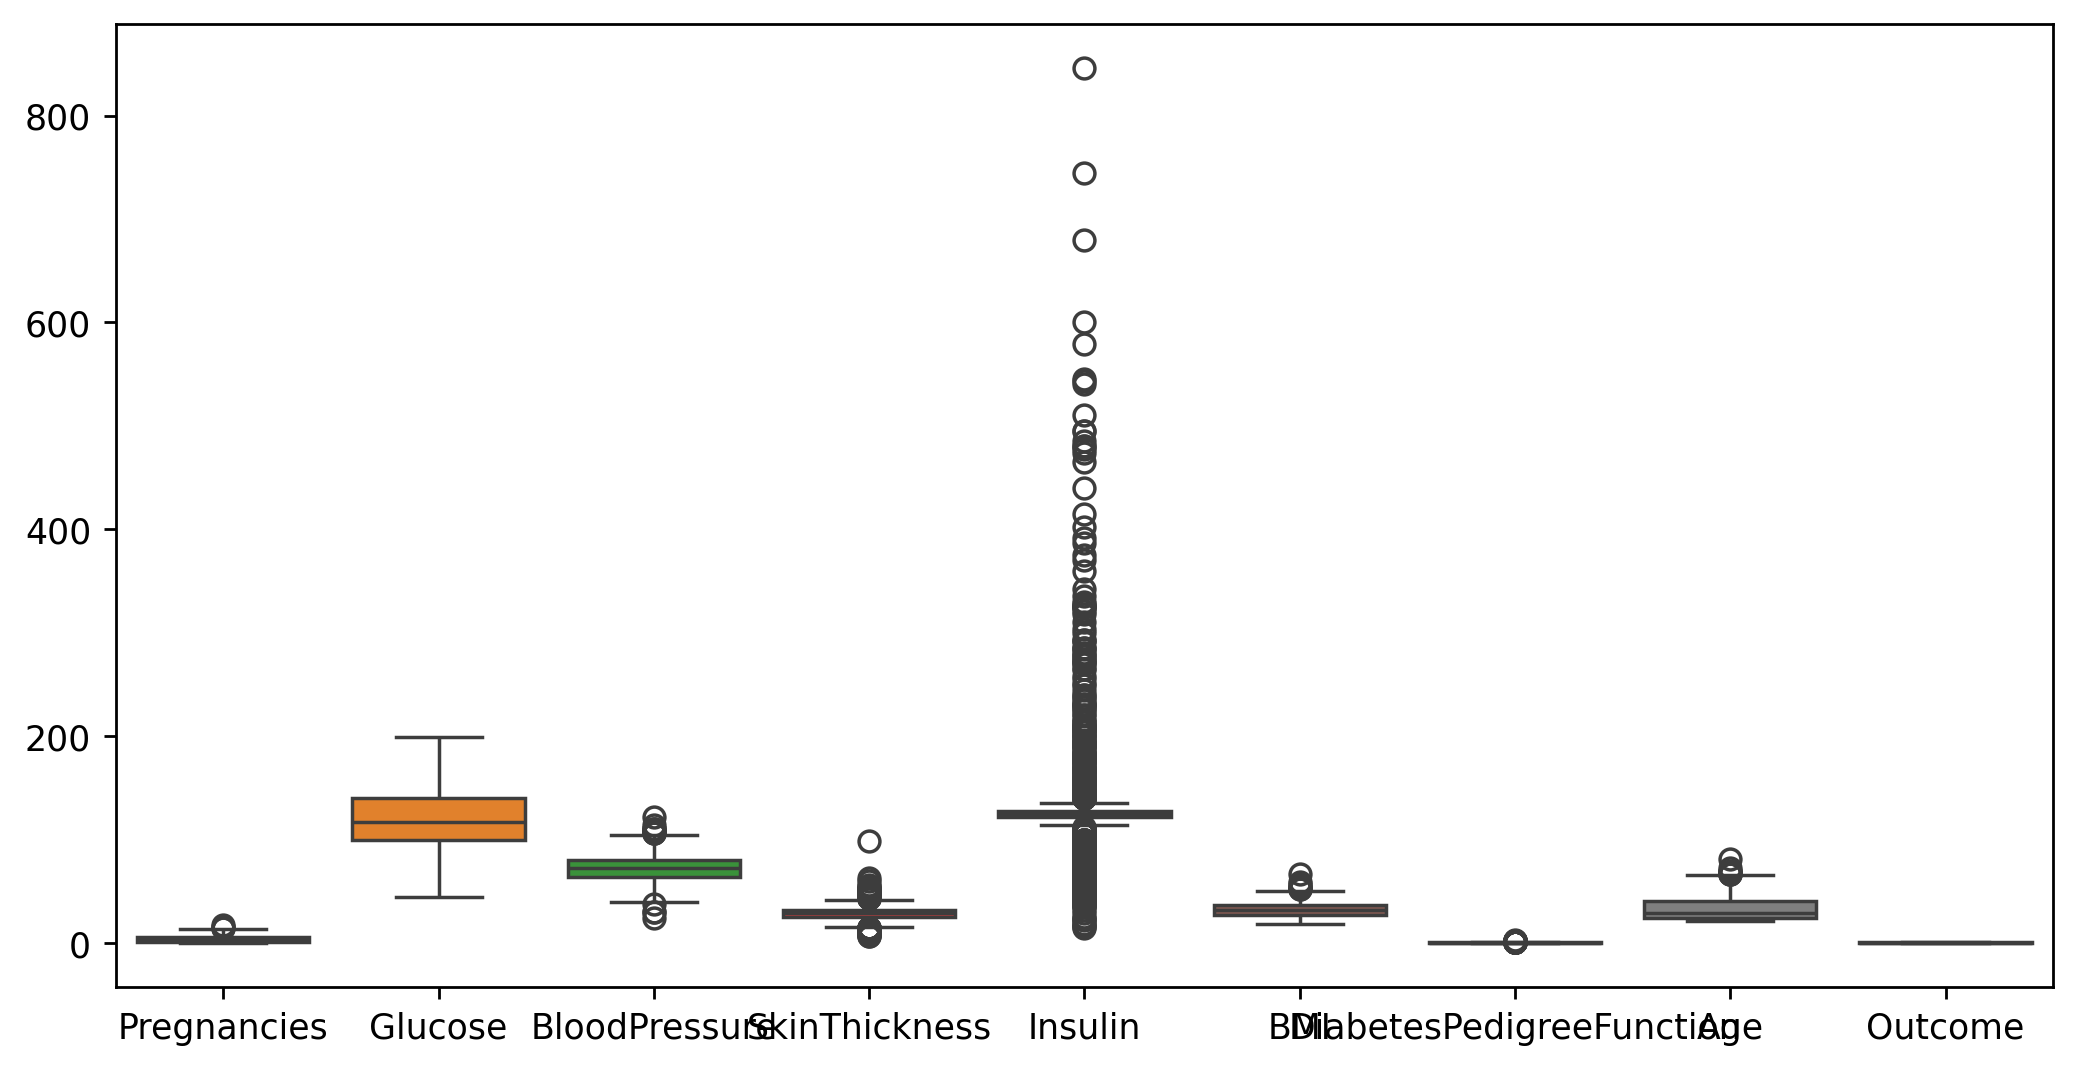

In [30]:
# checking for outliers
sns.boxplot(df)

In [ ]:
# altough there are outliers but these outliers are crucial for the detection(prediction) of the diabetic petients
# So I cannot remove or cap these outliers here

# DATA TRANSFORMATION

In [ ]:
# Scalling is necessary for the KNN because in the backend it calculates distances from the nearest datapoints

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
# defining x and y variables
x = df.loc[: , 'Pregnancies':'Age']
y = df['Outcome']

In [63]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [64]:
# just for understanding
pd.DataFrame(x_scaled, columns=x.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [78]:
# splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=2)
# confirming
xtrain.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124.0,74.0,36.0,125.0,27.8,0.100,30
429,1,95.0,82.0,25.0,180.0,35.0,0.233,43
623,0,94.0,70.0,27.0,115.0,43.5,0.347,21
209,7,184.0,84.0,33.0,125.0,35.5,0.355,41


In [79]:
xtest.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,2,88.0,74.0,19.0,53.0,29.0,0.229,22
251,2,129.0,84.0,29.0,125.0,28.0,0.284,27
631,0,102.0,78.0,40.0,90.0,34.5,0.238,24
757,0,123.0,72.0,29.0,125.0,36.3,0.258,52


In [80]:
ytrain.head(4)

602    0
429    1
623    0
209    1
Name: Outcome, dtype: int64

In [81]:
ytest.head(4)

158    0
251    0
631    0
757    1
Name: Outcome, dtype: int64

# MODEL 

In [82]:
# KNN MODELS class
# Now, I don't know the correct number of nearest neighbors so I am randomly selecting 3 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# training model
knn.fit(xtrain, ytrain)

# getting prediction
ypred = knn.predict(xtest)
ypred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [83]:
# model evaluation
print(f'training accuracy: {knn.score(xtrain, ytrain)}')
print(f'testing accuracy: {knn.score(xtest, ytest)}')
print('--'*30)
print(classification_report(ytest, ypred))

training accuracy: 0.8241042345276873
testing accuracy: 0.7467532467532467
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       109
           1       0.56      0.60      0.58        45

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154



In [84]:
# there is overfitting in the model
# solution is hyperparameter tunning

# HYPERPARAMETER TUNNING

In [85]:
train_acc = []
test_acc = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

In [86]:
train_acc

[1.0,
 0.8241042345276873,
 0.8241042345276873,
 0.7996742671009772,
 0.8061889250814332,
 0.8029315960912052,
 0.7833876221498371,
 0.7866449511400652,
 0.7850162866449512,
 0.7850162866449512,
 0.7801302931596091,
 0.7931596091205212,
 0.7785016286644951,
 0.7768729641693811,
 0.7752442996742671,
 0.7654723127035831,
 0.7703583061889251,
 0.7736156351791531,
 0.7703583061889251,
 0.7687296416938111]

In [87]:
test_acc

[0.7077922077922078,
 0.7662337662337663,
 0.7467532467532467,
 0.7272727272727273,
 0.7207792207792207,
 0.7532467532467533,
 0.7402597402597403,
 0.7532467532467533,
 0.7402597402597403,
 0.7532467532467533,
 0.7662337662337663,
 0.7727272727272727,
 0.7597402597402597,
 0.7727272727272727,
 0.7402597402597403,
 0.7662337662337663,
 0.7532467532467533,
 0.7597402597402597,
 0.7467532467532467,
 0.7662337662337663]

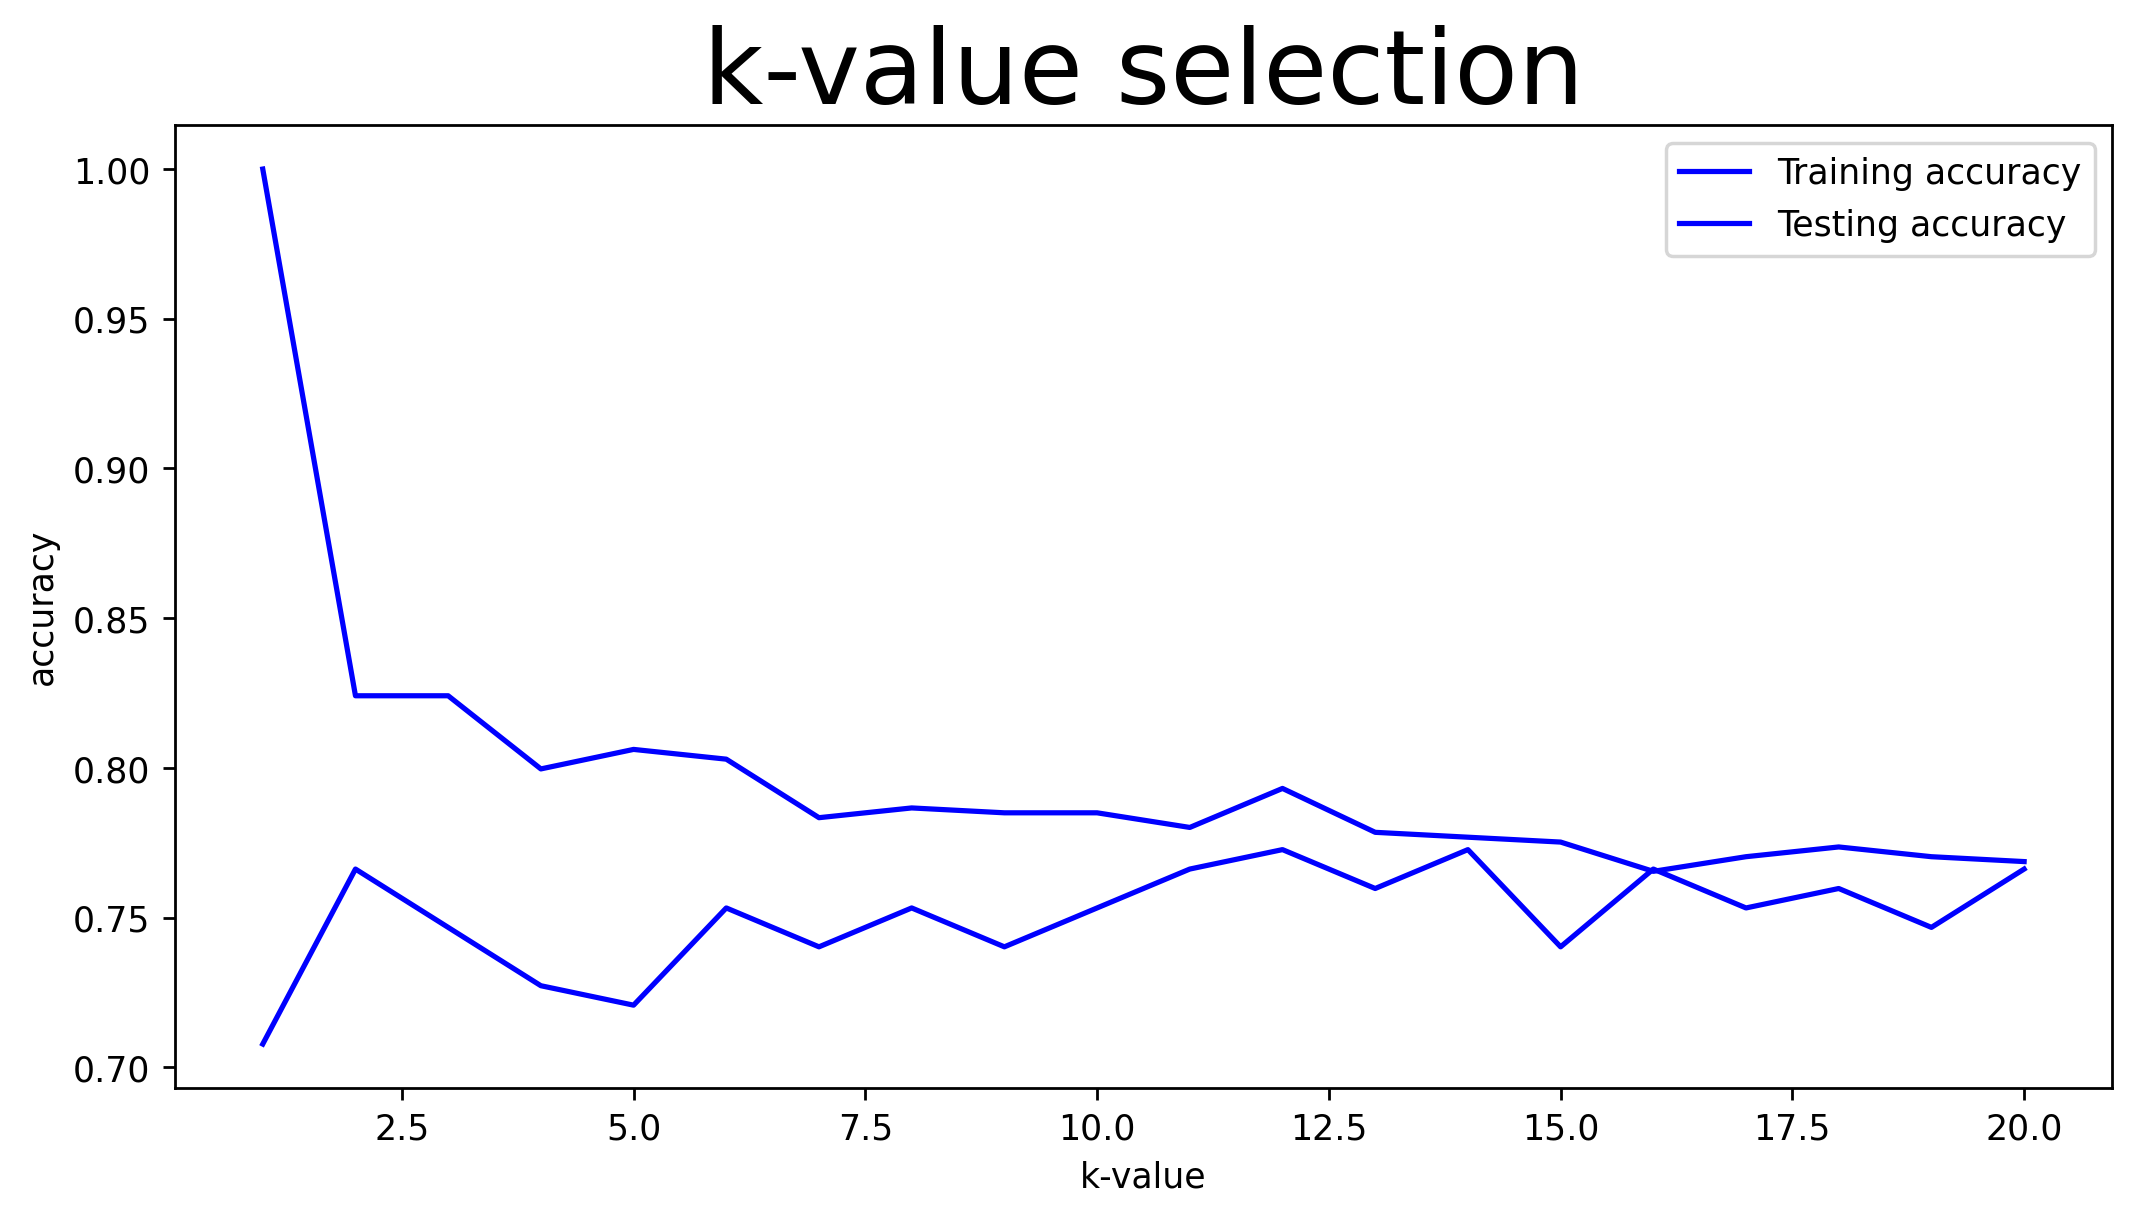

In [88]:
# plotting graph to get the best paarmeter(number of nearest neighbors)
plt.plot(range(1, 21), train_acc, color='blue', label='Training accuracy')
plt.plot(range(1, 21), test_acc, color='blue', label='Testing accuracy')
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.title('k-value selection', size=30)
plt.legend()

In [ ]:
# almost 14 is the correct values for K

# FINAL MODEL

In [89]:
# building model with k=14
knn_final = KNeighborsClassifier(n_neighbors=14)
# training
knn_final.fit(xtrain, ytrain)
# prediction
pred = knn_final.predict(xtest)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [90]:
# model evaluation
print(f'training accuracy: {knn_final.score(xtrain, ytrain)}')
print(f'testing accuracy: {knn_final.score(xtest, ytest)}')
print('--'*30)
print(classification_report(ytest, pred))

training accuracy: 0.7768729641693811
testing accuracy: 0.7727272727272727
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.62      0.56      0.59        45

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# now I am getting generalized model because there is no overfitting in the model
# accuracy is 77%
# if I want to increase the accuracy of the model then I need to increase the amount of data